# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     print(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
count = len(cities)
count

766

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Your objective is to build a series of scatter plots to showcase the following relationships:

#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

In [3]:

base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": api_key,
    "units": "imperial"
#     "q":"Klaksvik"
}


# response = requests.get(base_url, params=params)
# print(response.url)

In [ ]:

weather =[]
count = 0
setcount=1

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    params["q"] = city,
    response = requests.get(base_url,params=params)
    response_json = response.json()
#     print(response.url)
    
    if response_json.get("id"):
        cityname = response_json["name"]
        
        if count < 49:
            setcount = setcount
            count = count +1
        else:
            setcount = setcount + 1
            count = 0
            
        print(f"Processing Record {count} of Set {setcount} | {cityname}")        
        weather.append({"CityID": response_json["id"],
                        "City": response_json["name"],
                        "Lat": response_json["coord"]["lat"],
                        "Lng" : response_json["coord"]["lon"],
                        "Max Temp": response_json["main"]["temp_max"],
                        "Humidity": response_json["main"]["humidity"],
                        "Cloudness": response_json["clouds"]["all"],
                        "Wind Speed": response_json["wind"]["speed"]
                       })
    else:
        print("City not found. Skipping...")
        

        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

#     print(weather_df)
#     try:
     


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Rikitea
Processing Record 2 of Set 1 | Sao Miguel do Araguaia
Processing Record 3 of Set 1 | Coihaique
City not found. Skipping...
Processing Record 4 of Set 1 | Busselton
Processing Record 5 of Set 1 | Goderich
Processing Record 6 of Set 1 | Kapaa
Processing Record 7 of Set 1 | Acajutla
Processing Record 8 of Set 1 | Port Blair
Processing Record 9 of Set 1 | Punta Arenas
Processing Record 10 of Set 1 | Taoudenni
Processing Record 11 of Set 1 | Sabang
Processing Record 12 of Set 1 | Marrakesh
Processing Record 13 of Set 1 | Aswan
Processing Record 14 of Set 1 | Tete
Processing Record 15 of Set 1 | Kawalu
Processing Record 16 of Set 1 | Penalva
Processing Record 17 of Set 1 | Mehamn
City not found. Skipping...
Processing Record 18 of Set 1 | Naze
Processing Record 19 of Set 1 | Upernavik
Processing Record 20 of Set 1 | Kodiak
Processing Record 21 of Set 1 | Kavaratti
Processing Record 22 of Set 1 | Mat

Processing Record 33 of Set 4 | Whitianga
Processing Record 34 of Set 4 | Shumskiy
Processing Record 35 of Set 4 | Clyde River
Processing Record 36 of Set 4 | Ruwi
Processing Record 37 of Set 4 | Juba
Processing Record 38 of Set 4 | Bredasdorp
Processing Record 39 of Set 4 | Westport
Processing Record 40 of Set 4 | Qandala
City not found. Skipping...
Processing Record 41 of Set 4 | San Andres
Processing Record 42 of Set 4 | Manakara
Processing Record 43 of Set 4 | Mandan
Processing Record 44 of Set 4 | Avera
Processing Record 45 of Set 4 | Poronaysk
Processing Record 46 of Set 4 | Valkeala
Processing Record 47 of Set 4 | Ribeira Grande
Processing Record 48 of Set 4 | Dikson
Processing Record 49 of Set 4 | Chuy
Processing Record 0 of Set 5 | Castro
Processing Record 1 of Set 5 | Porto Walter
Processing Record 2 of Set 5 | Khani
Processing Record 3 of Set 5 | Morant Bay
Processing Record 4 of Set 5 | Port Lincoln
Processing Record 5 of Set 5 | Mayya
City not found. Skipping...
Processing

Processing Record 20 of Set 8 | Lumphat
Processing Record 21 of Set 8 | Najran
Processing Record 22 of Set 8 | Glendive
Processing Record 23 of Set 8 | Oistins
Processing Record 24 of Set 8 | Terney
Processing Record 25 of Set 8 | Kharp
Processing Record 26 of Set 8 | Moranbah
Processing Record 27 of Set 8 | Shaunavon
Processing Record 28 of Set 8 | Kachug
Processing Record 29 of Set 8 | Tiznit
Processing Record 30 of Set 8 | Hamilton
Processing Record 31 of Set 8 | Yumen
Processing Record 32 of Set 8 | Port Elizabeth
Processing Record 33 of Set 8 | Kapit
Processing Record 34 of Set 8 | Grand Gaube
Processing Record 35 of Set 8 | Bathsheba
Processing Record 36 of Set 8 | Trairi
Processing Record 37 of Set 8 | Vangaindrano
Processing Record 38 of Set 8 | Cap-aux-Meules
Processing Record 39 of Set 8 | Bestobe
Processing Record 40 of Set 8 | Dingle
Processing Record 41 of Set 8 | Palmeira
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 8 | Yarmouth
Proc

Processing Record 6 of Set 12 | Adre
Processing Record 7 of Set 12 | Boo
Processing Record 8 of Set 12 | Kualakapuas
Processing Record 9 of Set 12 | Raub
Processing Record 10 of Set 12 | Moron
Processing Record 11 of Set 12 | Poum
City not found. Skipping...
Processing Record 12 of Set 12 | Polyarnyy
Processing Record 13 of Set 12 | Khandbari
Processing Record 14 of Set 12 | Antalaha
Processing Record 15 of Set 12 | Douentza
Processing Record 16 of Set 12 | Muzhi
City not found. Skipping...
Processing Record 17 of Set 12 | Moyale
Processing Record 18 of Set 12 | Xichang
Processing Record 19 of Set 12 | Takaungu
Processing Record 20 of Set 12 | Ozernovskiy
Processing Record 21 of Set 12 | Altay
Processing Record 22 of Set 12 | Ola
Processing Record 23 of Set 12 | Verkhnevilyuysk
Processing Record 24 of Set 12 | Garowe
Processing Record 25 of Set 12 | Zhanjiang
Processing Record 26 of Set 12 | Laem Sing
Processing Record 27 of Set 12 | Quelimane
Processing Record 28 of Set 12 | Leirvik
C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_df = pd.DataFrame(weather)

# # weather_df.count() 689
# 	cityid	cloudness	country	humidity	lat	lon	name	temp	windspeed
weather_no_dups_df = weather_df.drop_duplicates(subset="CityID", keep='first', inplace=False)
# weather_no_dups_df.count() 687
weather_no_dups_df.count()

City          687
CityID        687
Cloudness     687
Humidity      687
Lat           687
Lng           687
Max Temp      687
Wind speed    687
dtype: int64

In [30]:
weather_no_dups_df.to_csv("WeatherPy.csv")
weather_no_dups_df.head()

,City,CityID,Cloudness,Humidity,Lat,Lng,Max Temp,Wind speed
0,Rikitea,4030556,81,58,-23.12,-134.97,69.53,7.67
1,Sao Miguel do Araguaia,3448455,2,39,-13.28,-50.16,71.15,5.64
2,Coihaique,3894426,0,64,-45.58,-72.07,35.60,4.70
3,Busselton,2075265,63,30,-33.64,115.35,75.00,9.57
4,Goderich,5962442,100,78,43.74,-81.71,64.99,14.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [55]:
# help(plt.scatter)

Text(0, 0.5, 'Max Temperature (F)')

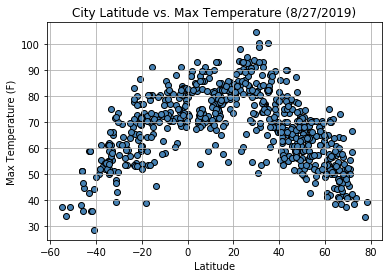

In [54]:
x = weather_no_dups_df["Lat"]
y = weather_no_dups_df["Max Temp"]

plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black", linewidths=1)
plt.grid()
plt.title("City Latitude vs. Max Temperature (8/27/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

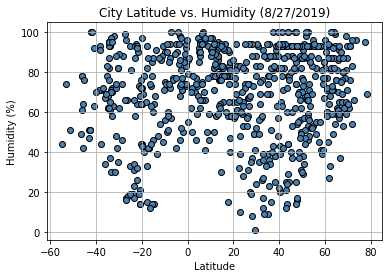

In [57]:
x = weather_no_dups_df["Lat"]
y = weather_no_dups_df["Humidity"]

plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black", linewidths=1)
plt.grid()
plt.title("City Latitude vs. Humidity (8/27/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudness (%)')

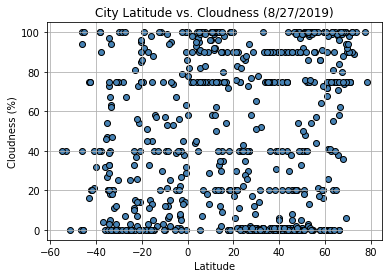

In [58]:
x = weather_no_dups_df["Lat"]
y = weather_no_dups_df["Cloudness"]

plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black", linewidths=1)
plt.grid()
plt.title("City Latitude vs. Cloudness (8/27/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudness (%)")

#### Latitude vs. Wind Speed Plot

In [59]:
x = weather_no_dups_df["Lat"]
y = weather_no_dups_df["Wind Speed"]

plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black", linewidths=1)
plt.grid()
plt.title("City Latitude vs. Wind Speed (8/27/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")

KeyError: 'Wind Speed'